# 1 - Introduction

Dataset resource : https://www.kaggle.com/datasets/blastchar/telco-customer-churn

Heroku-app : http://frontend-m-one-p-two-ocha.herokuapp.com

## Identity
<p> Name : Shafira Laksitasari </p>
<p> Batch : FTDS-014 </p>
<p> Dataset : Telco Customer Churn </p>
<p> Objective : Create an ANN (Artificial Neural Network) model to predict whether a customer will churn or not </p>

## Description

As a data scientist in Telco company, I am about to predict whether a customer will churn or not based on the provided dataset.
The data set contains details about: 
- Customers that have left within the past month are listed in the Churn column. 
- Each client has signed up for the following services: phone, multiple lines, internet, online security, online backup, device protection, tech assistance, and streaming TV and movies. 
- Information about the customer's account, including how long they've been a customer, their contract, preferred payment method, paperless billing preferences, monthly costs, and total charges 
- Customer demographic information, including gender, age range, and the presence of partners and dependents



# 2 - Import Libraries

In [134]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import pathlib
from sklearn.metrics import confusion_matrix ,accuracy_score

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler,OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import pickle


# 3 - Data Loading

In [135]:
# Display max column
pd.set_option("display.max.columns", None)

In [136]:
# Import data
df = pd.read_csv('h8dsft_Milestone1P2_shafira_laksitasari.csv', skipinitialspace=True)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


The data is inputted with skip initial space because it is found that there is a value that has a space in initial character.

In [137]:
# Check Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


From the information above, it is found that there are attributes that are null. The null attribute is Total Charges which will later be handled by handling Missing Value in data reprocessing. As for the data type, there are still some that are improper. The data type that doesn't fit is Total Charges which should be numerical but the type is actually a string. For that case, the data type later will be changed. Furthermore, for those whose data type is Binary (Yes/No) later when the data is reprocessing it will be changed to numerical form as well.

In [138]:
# Convert Data Type
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

To make data processing easier, the value in Senior Citizen will be converted to Yes and No.

In [139]:
#Change Value in SeniorCitizen

df['SeniorCitizen'] = df['SeniorCitizen'].replace([0],'No')
df['SeniorCitizen'] = df['SeniorCitizen'].replace([1],'Yes')

In [140]:
# Check Dataset for mean, std, min, qartile, and max
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


Based on the information above, it can be seen that:
1. The average tenure for each customer is 32 months. The fastest tenure is less than a month and the longest tenure is 72 months.
2. The average monthly charge per customer is 64.76 USD. The lowest charge for monthly charge is 18.2 USD and the highest charge is 118.75 USD.
3. The average total charge per customer is 2283.3 USD. The lowest charge for Total charge is 18.80 USD and the highest charge is 8684.8 USD.

# 4 - Exploratory Data Analysis (EDA)

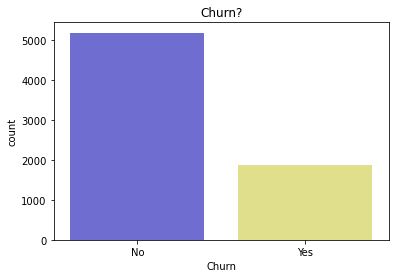

In [141]:
sns.countplot(x='Churn', data=df, palette=["#605ce0", '#eded7e'])
plt.title('Churn?')
plt.show()

In [142]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

From the results of the churn customers, there were 5174 people who were still loyal Telco, while 1869 people who no longer subscribed to Telcos. The amount between churn and not is not balanced. From a company perspective, this is more preferable because at least there are still many who want to use Telco services.

In [143]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


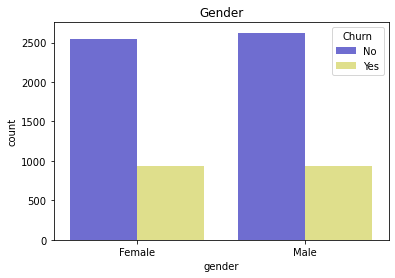

In [144]:
sns.countplot(x='gender', data=df, hue='Churn', palette=["#605ce0", '#eded7e'])
plt.title('Gender')
plt.show()

In [145]:
df.groupby(['gender','Churn'])['Churn'].count()

gender  Churn
Female  No       2549
        Yes       939
Male    No       2625
        Yes       930
Name: Churn, dtype: int64

Based on the graph above, it can be seen that the number of male and female customers is almost similar. However, in overall male customers, there are 67 more people than female customers. When viewed from the Churn category, more female customers stop their contract with Telco than male.

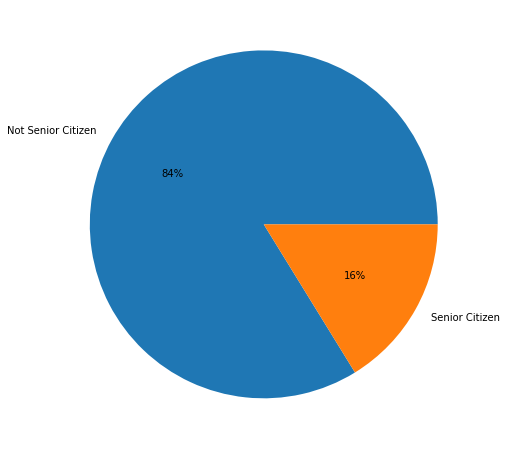

In [146]:
pie_chart_senci_name = df['SeniorCitizen'].value_counts().index.tolist()
pie_chart_senci_total = df['SeniorCitizen'].value_counts().tolist()

plt.figure(figsize = (15,8))
plt.pie(pie_chart_senci_total, labels = ['Not Senior Citizen', 'Senior Citizen'], autopct='%.0f%%')
plt.show()

In [147]:
pd.DataFrame(df.groupby(['SeniorCitizen','Churn'])['Churn'].count())

Churn
SeniorCitizen Churn       
No            No      4508
              Yes     1393
Yes           No       666
              Yes      476

The dataset also illustrate that as many as 84% of Telco customers are not Senior Citizens. Meanwhile, 16% of them have become senior netizens. The number of non-senior citizens is more due to the possibility that they still need telecommunication services more than senior citizens. Therefore, when viewed from the table above, the number of customers who churn in Senior can be said to be quite a lot when viewed from the proportion of those who churn and those who do not.

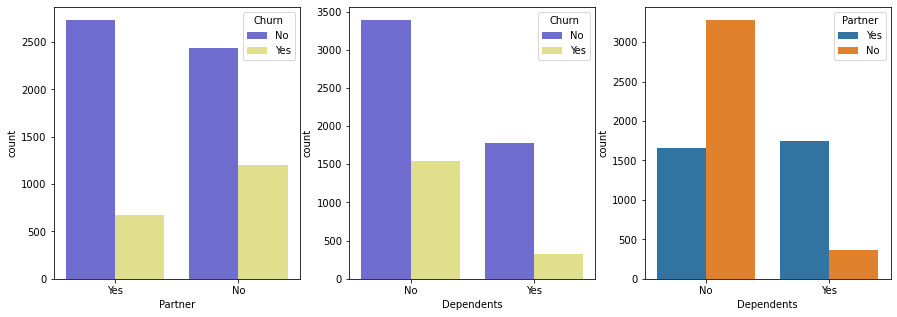

In [148]:
fig, ax =plt.subplots(1,3, figsize = (15,5))
sns.countplot(x='Partner', data=df, hue='Churn', palette=["#605ce0", '#eded7e'], ax=ax[0])
sns.countplot(x='Dependents', data=df, hue='Churn', palette=["#605ce0", '#eded7e'], ax=ax[1])
sns.countplot(x='Dependents', data=df, hue='Partner', ax=ax[2])
plt.show()

The graph above describes the 2 demographics of Telco customers. Based on the Partner chart, it can be seen that most of Telco's customers do not have a Partner. However, when viewed from the Churn number, most loyal customers are those who have partners, although the difference with those who do not have partners is not much different. While those who churn mostly are those who do not have a Partner.
For the Dependent graph, most Telco customers are not dependent, in the sense that they are still dependent on partners or other people. In both categories Churn is dominant in these independents.
Meanwhile, when viewed from the third graph, most of the customers who are not dependents do not have partners. For the dependents, mostly have partners. This makes it possible that customers who are mostly independents have their own income while those who are dependents do not have their own income.

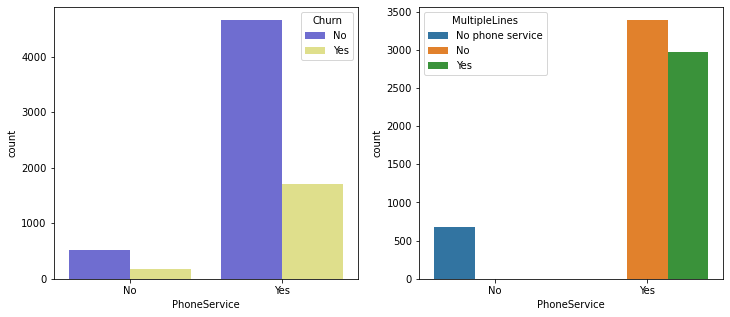

In [149]:
fig, ax =plt.subplots(1,2, figsize = (12,5))
sns.countplot(x='PhoneService', data=df, hue='Churn', palette=["#605ce0", '#eded7e'], ax=ax[0])
sns.countplot(x='PhoneService', data=df, hue='MultipleLines', ax=ax[1])
plt.show()

Most customers use Phone Service provided by Telco. Those who not use Phone Service only subscribe to Internet Service but only a few in number. When viewed from the churn category, most are still subscribed to Telco. As for the Multiple line, the number that has multiple lines and those who not are nearly similiar. Customers who opt for multiple lines will be charged a higher charge. For information that the No and yes MultipleLines options are only owned by those who have PhoneService.

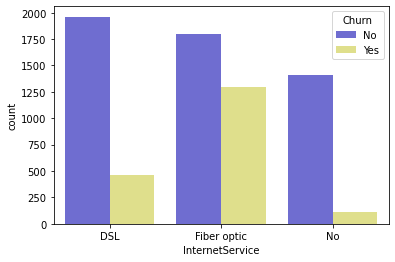

In [150]:
sns.countplot(x='InternetService', data=df, hue='Churn', palette=["#605ce0", '#eded7e'])

plt.show()

In [151]:
pd.DataFrame(df.groupby(['InternetService','Churn'])['Churn'].count())

Churn
InternetService Churn       
DSL             No      1962
                Yes      459
Fiber optic     No      1799
                Yes     1297
No              No      1413
                Yes      113

There are 2 kinds of options for subscribing to Internet Service, namely Fiber Optics and DSL. There are 3096 customers choosing Fiber Optics, 2421 customers choosing DSL, and 1526 customers not subscribe to internet service provided by Telco. Based on the graph, even though Fiber Optics has the most customers, there are also a lot of customers who churn from this service. The number of churn is very large so that currently DSL services are the highest. The Internet Service also provides options for Online Security, Online Backup, Device Protection, Tech Support, Streaming TV, and Streaming Movies. Customers who do not subscribe to the internet will automatically not have Online Security, Online Backup, Device Protection, Tech Support, Streaming TV, and Streaming Movies.

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

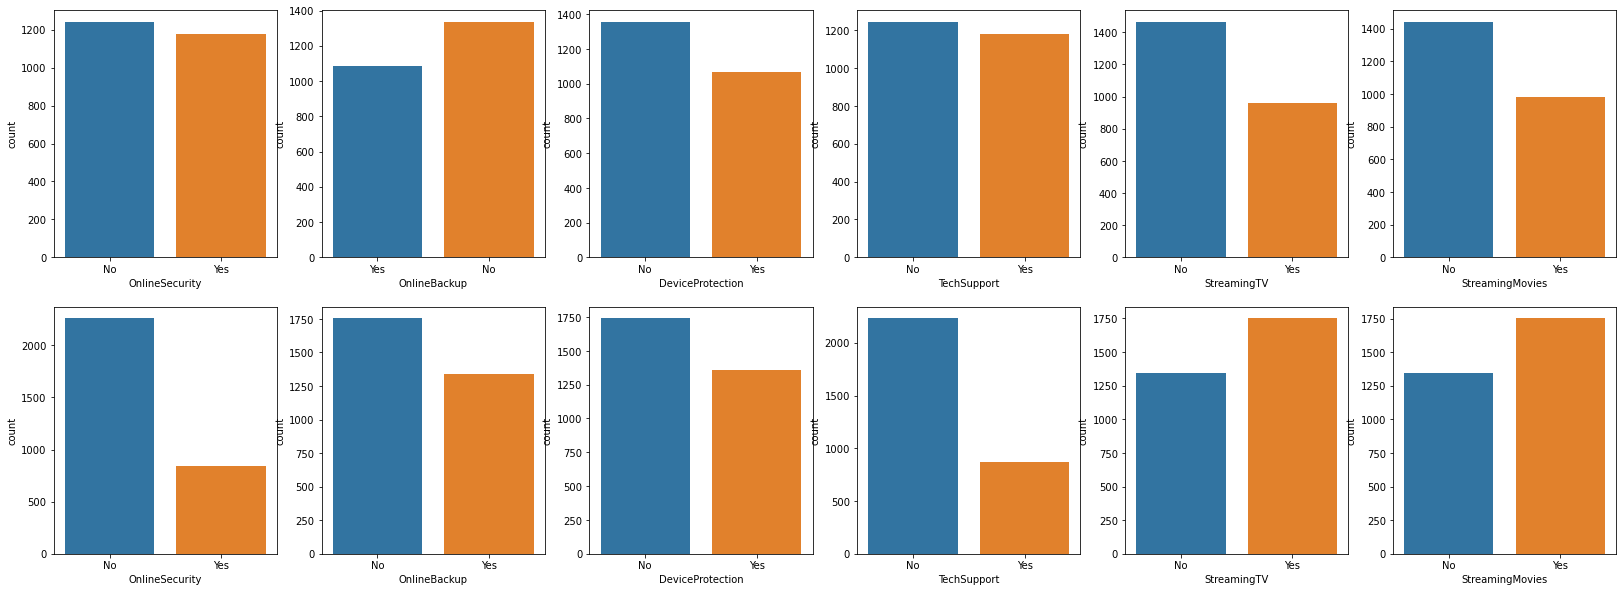

In [152]:
dsl_service = df[(df['InternetService'] == 'DSL')]
fo_service = df[(df['InternetService'] == 'Fiber optic')]

fig, ax =plt.subplots(2,6, figsize = (28,10))
sns.countplot(x='OnlineSecurity', data=dsl_service, ax=ax[0,0])
sns.countplot(x='OnlineBackup', data=dsl_service, ax=ax[0,1])
sns.countplot(x='DeviceProtection', data=dsl_service, ax=ax[0,2])
sns.countplot(x='TechSupport', data=dsl_service, ax=ax[0,3])
sns.countplot(x='StreamingTV', data=dsl_service, ax=ax[0,4])
sns.countplot(x='StreamingMovies', data=dsl_service, ax=ax[0,5])
sns.countplot(x='OnlineSecurity', data=fo_service, ax=ax[1,0])
sns.countplot(x='OnlineBackup', data=fo_service, ax=ax[1,1])
sns.countplot(x='DeviceProtection', data=fo_service, ax=ax[1,2])
sns.countplot(x='TechSupport', data=fo_service, ax=ax[1,3])
sns.countplot(x='StreamingTV', data=fo_service, ax=ax[1,4])
sns.countplot(x='StreamingMovies', data=fo_service, ax=ax[1,5])



When viewed from both DSL internet services (top row) and Fiber Optic (bottom row), it can be seen that both types of services have OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, and StreamingMovies options. Those option only selection whether the customer wants to sign up internet service with this additional services or not. Usually, the more additional services, the higher the charge issued by the customer.



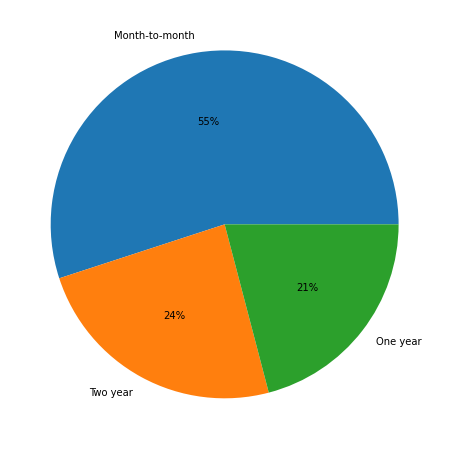

In [153]:
pie_chart_contract_name = df['Contract'].value_counts().index.tolist()
pie_chart_contract_total = df['Contract'].value_counts().tolist()

plt.figure(figsize = (15,8))
plt.pie(pie_chart_contract_total, labels = pie_chart_contract_name, autopct='%.0f%%')
plt.show()


Two year contracts will be charged more than one year or per month only. This is obvious because if the customer paid the service annually, then they do not need to pay monthly. From the pie chart above, it can be seen that most customers choose a Telco subscription contract with month to month. This means that as many as 55% of customers prefer to contract for a month. And when viewed from the churn graph below:

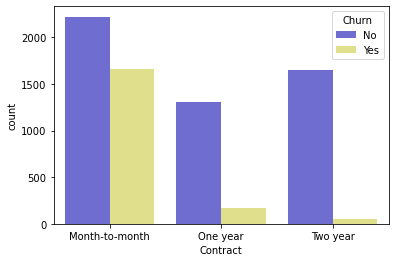

In [154]:
sns.countplot(x='Contract', data=df, hue='Churn', palette=["#605ce0", '#eded7e'])

plt.show()

Most customers who churn are those whose subscription contracts are only monthly. This is because a monthly subscription will be safer to terminate the contract because the cost is not as high as during a one year or two year contract. Usually, customers whose contracts are at one year or two years, when they about to churn, they will terminate the contract at the end of the period to avoid losses.

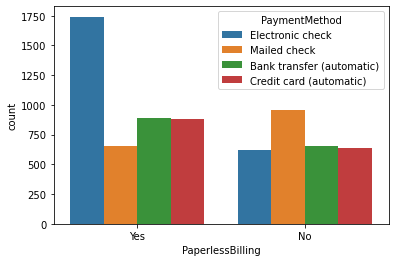

In [155]:
sns.countplot(x='PaperlessBilling', data=df, hue='PaymentMethod')

plt.show()

In [156]:
pd.DataFrame(df.groupby(['PaperlessBilling','PaymentMethod'])['PaymentMethod'].count())

PaymentMethod
PaperlessBilling PaymentMethod                           
No               Bank transfer (automatic)            653
                 Credit card (automatic)              640
                 Electronic check                     623
                 Mailed check                         956
Yes              Bank transfer (automatic)            891
                 Credit card (automatic)              882
                 Electronic check                    1742
                 Mailed check                         656

Telco provides payment services using Electronic Check, Mailed Check, Bank transfer, and Credit card. Each of the four methods has the option of whether the billing requires paper or not. When viewed from the Paperless billing, most customers choose not to use paper and the majority of the method is Electronic Check. As for those who use Paper, most of them choose the Mailed Check payment method. Some customers choose to use paperless billing so that information data between customers and telcos can be more securely maintained, but sometimes customers will find it easier to miss payments with this billing method. For those with paper option, usually they choosing this option to get a simple reminder and sometimes keep the proof of payment can be more conevenient for them. However, customers who do not choose paperless billing will usually incur additional fees for paper, envelopes, stamps and others.


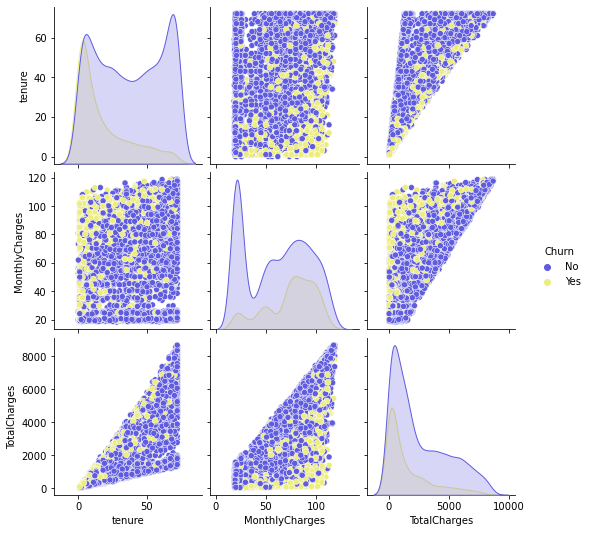

In [157]:
df_pairplot = df[['tenure','MonthlyCharges','TotalCharges','Churn']]
sns.pairplot(df_pairplot, hue='Churn', height=2.5, palette=["#605ce0", '#eded7e']);

From the Pairplot above, we can see the position of customers who tend to churn and those who are not in numerical data. Previously, in the diagonal section in the form of a distribution plot, it can be seen the density of each numerical data that divides the Churn category. In tenure, there is no specific range that indicates that a person churns or not, but in those who churn the tenure tends to be shorter. As for the Monthly charges, the range is also similiar, but customers who churn tend to stop because they are charged at a high amount. The last distplot is Total Charges, where the range and pattern are not much different and the two churn categories tend to overlap to the left.
Meanwhile, when viewed from the scatter plot:
1. Between tenure and MonthlyCharges: There is no relationship between the two attributes because the charge depends on the service signed up by the customer. However, customers who churn tend to have high Monthly Charges.
2. Between MonthlyCharges and TotalCharges: The higher the Total Charges, the higher the Monthly Charges. It can be seen that none of the data has a low MonthlyCharges and a high TotalCharges. But there is a lot of data where MonthlyCharges is high but TotalCharges is low. In the position of high charges, many customers churn.
3. Between TotalCharges and tenure: As before, the distribution forms a triangle. The longer the tenure, the higher the charge. There is no data with high total charge but low tenure. Most of the customers who churn in this data are those whose tenure and total charge are equivalent (linearly related) but the pattern is still not clear.

From some of the information above, there is no definite information when it is time for customer to churn and when not to churn when viewed from the demographics, signed up services, and account information. However, some customers stop subscribing when they are subject to a high charge. Another possibility is that the customer will churn if the Telco provider is unsatisfactory or the service offered is lacking so that they feel that there is another provider that is better.

# 5 - Data Prepocessing

## Get Inference

In [158]:
# Get Data for Model Inference

df_inf = df.sample(10, random_state = 99) #change random state
df_inf

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2905,4692-NNQRU,Female,No,Yes,No,21,Yes,No,Fiber optic,No,No,Yes,Yes,No,No,One year,No,Electronic check,79.20,1742.45,No
6651,2038-YSEZE,Female,No,No,No,29,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Month-to-month,No,Mailed check,67.45,1801.10,No
5321,7718-UPSKJ,Female,No,Yes,No,69,Yes,No,Fiber optic,Yes,Yes,No,Yes,Yes,Yes,One year,Yes,Credit card (automatic),106.40,7251.90,No
4293,2114-MGINA,Female,No,No,No,14,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Mailed check,89.80,1129.10,Yes
5686,4369-HTUIF,Male,Yes,No,No,6,Yes,No,Fiber optic,Yes,No,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),85.15,503.60,Yes
2665,8166-ORCHU,Male,Yes,Yes,No,33,Yes,No,Fiber optic,Yes,Yes,No,Yes,No,Yes,One year,Yes,Electronic check,93.55,3055.50,No
457,0942-KOWSM,Female,No,Yes,Yes,30,Yes,No,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),80.80,2369.30,No
1106,4159-NAAIX,Female,No,No,No,63,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Two year,No,Bank transfer (automatic),97.45,6253.00,No
4945,1223-UNPKS,Male,No,Yes,Yes,20,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.05,400.00,No
7037,2569-WGERO,Female,No,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No


In [159]:
# Remove Inference-Set from dataset

df_train_test = df.drop(df_inf.index)
df_train_test

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [160]:
# Reset Index (Minimalizing error)

df_train_test.reset_index(drop=True, inplace=True)
df_inf.reset_index(drop=True, inplace=True)
df_inf

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4692-NNQRU,Female,No,Yes,No,21,Yes,No,Fiber optic,No,No,Yes,Yes,No,No,One year,No,Electronic check,79.20,1742.45,No
1,2038-YSEZE,Female,No,No,No,29,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Month-to-month,No,Mailed check,67.45,1801.10,No
2,7718-UPSKJ,Female,No,Yes,No,69,Yes,No,Fiber optic,Yes,Yes,No,Yes,Yes,Yes,One year,Yes,Credit card (automatic),106.40,7251.90,No
3,2114-MGINA,Female,No,No,No,14,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Mailed check,89.80,1129.10,Yes
4,4369-HTUIF,Male,Yes,No,No,6,Yes,No,Fiber optic,Yes,No,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),85.15,503.60,Yes
5,8166-ORCHU,Male,Yes,Yes,No,33,Yes,No,Fiber optic,Yes,Yes,No,Yes,No,Yes,One year,Yes,Electronic check,93.55,3055.50,No
6,0942-KOWSM,Female,No,Yes,Yes,30,Yes,No,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),80.80,2369.30,No
7,4159-NAAIX,Female,No,No,No,63,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Two year,No,Bank transfer (automatic),97.45,6253.00,No
8,1223-UNPKS,Male,No,Yes,Yes,20,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.05,400.00,No
9,2569-WGERO,Female,No,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No


## Drop Unique Features

In [161]:
# Unique Column to Drop

dropped_col_df = df_train_test.drop(['customerID'],axis=1)

dropped_col_df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Splitting between 'X' (Features) and 'y' (Target)

In [162]:
# Splitting Features and Target

x = dropped_col_df.drop('Churn', axis = 1)
y = dropped_col_df['Churn']

x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7028,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50
7029,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90
7030,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45
7031,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60


## Splitting between Train and Test

In [163]:
# Splitting train and test

x_train_full, x_test,  y_train_full, y_test = train_test_split(x, y, test_size = 0.1, random_state=22) 

# Checking train and test size

print('Features Train Size : ', x_train_full.shape,', Target Train Size : ', y_train_full.shape)
print('Features Test Size : ', x_test.shape,', Target Test Size : ', y_test.shape)

Features Train Size :  (6329, 19) , Target Train Size :  (6329,)
Features Test Size :  (704, 19) , Target Test Size :  (704,)


## Splitting between X train and X validation

In [164]:
# Splitting train and validation

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, shuffle=True, test_size=0.1) # test_size = 0.2, random_state=22

# Checking train and validation size

print('Features Train Size : ', x_train.shape,', Target Train Size : ', y_train.shape)
print('Features Validation Size : ', x_val.shape,', Target Validation Size : ', y_val.shape)

Features Train Size :  (5696, 19) , Target Train Size :  (5696,)
Features Validation Size :  (633, 19) , Target Validation Size :  (633,)


## Handling Missing Values

### Features Train

In [165]:
# Checking missing value in features train

x_train.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        9
dtype: int64

On X Train, it was found that there were missing Values on Total Charges. Because later outliers will be handled, then missing values will be handled first. This Missing Values number is not too large, therefore it will be filled with the median.

In [166]:
# Replace null with median

x_train['TotalCharges'].fillna(x_train_full["TotalCharges"].median(), inplace=True)



In [167]:
# Recheck the null

x_train.isnull().sum().sum()

0

### Features Validation

In [168]:
# Checking missing value in features val

x_val.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        1
dtype: int64

Do the same process with X val.

In [169]:
# Replace null with median

x_val['TotalCharges'].fillna(x_val["TotalCharges"].median(), inplace=True)


In [170]:
# Recheck the null

x_val.isnull().sum().sum()

0

### Features Test

In [171]:
# Checking missing value in features test

x_test.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        1
dtype: int64

Do the same process with X test.

In [172]:
# Replace null with median

x_test['TotalCharges'].fillna(x_test["TotalCharges"].median(), inplace=True)

In [173]:
# Recheck the null

x_test.isnull().sum().sum()

0

### Target Train

In [174]:
# Checking missing value in target train

y_train.isnull().sum()

0

No missing Value found.

### Target Validation

In [175]:
# Checking missing value in target Val

y_val.isnull().sum()

0

No missing Value found.

### Target Test

In [176]:
# Checking missing value in target test

y_test.isnull().sum()

0

No missing Value found.

## Handling Outlier

<AxesSubplot:title={'center':'TotalCharges distribution'}>

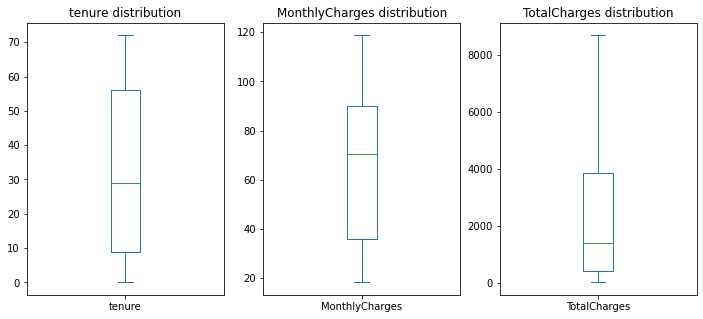

In [177]:
# Display Boxplot

fig, ax =plt.subplots(1,3, figsize = (12,5))
x_train['tenure'].plot(kind='box', title='tenure distribution',ax=ax[0])
x_train['MonthlyCharges'].plot(kind='box', title='MonthlyCharges distribution',ax=ax[1])
x_train['TotalCharges'].plot(kind='box', title='TotalCharges distribution',ax=ax[2])

From the boxplot above, there is no outlier in the X train numerical data. Therefore, the feature selection process will immediately continue.

## Feature Selection Numerical

In this numerical feature selection will be done with heatmap Correlation coefficient.

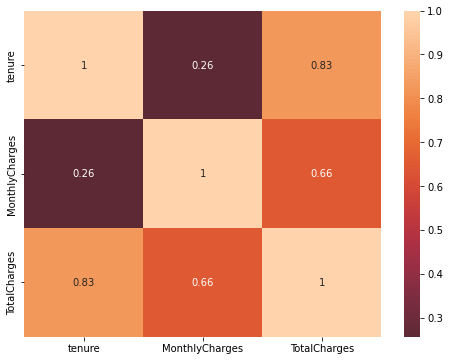

In [178]:
X_train_corr = x_train.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(X_train_corr, annot= True, center=0)
plt.show()

In the heatmap above, only numerical correlation values are given, while what will be sought is Churn categorization or not. Therefore, based on previous EDA information, there is a tendency for customers to churn when the charges are high, Monthly and Total Charges will be used. As for tenure, the EDA has also explained that churn customers also tend to stop for a shorter tenure. This tenure will also likely be used to categorize customers.

## Split between Numerical Columns and Categorical Columns

In [179]:
# Split numerical and categorical based on dt types

num_columns = ['tenure','MonthlyCharges','TotalCharges']
cat_columns = x.loc[:, ~x.columns.isin(num_columns)].columns.tolist()

print('Numerical Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

# Split set based on Column Types

x_train_num = x_train[num_columns]
x_val_num = x_val[num_columns]
x_test_num = x_test[num_columns]

x_train_cat = x_train[cat_columns]
x_val_cat = x_val[cat_columns]
x_test_cat = x_test[cat_columns]

# Checking features and target length

print('\nFeatures Train numeric length = ', len(x_train_num), ', Features Train categorical length =', len(x_train_cat))
print('Features Val numeric length = ', len(x_val_num), ', Features Val categorical length =', len(x_val_cat))
print('Features Test numeric length = ', len(x_test_num), ', Features Test categorical length =', len(x_test_cat))

Numerical Columns :  ['tenure', 'MonthlyCharges', 'TotalCharges']
Categorical Columns :  ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

Features Train numeric length =  5696 , Features Train categorical length = 5696
Features Val numeric length =  633 , Features Val categorical length = 633
Features Test numeric length =  704 , Features Test categorical length = 704


## Feature Scaling and Encoding

Later feature scaling and encoding will be transformed using the Pipeline algorithm.

,0,1,2
features,tenure,MonthlyCharges,TotalCharges
Skew,0.232665,-0.222352,0.949543
Standard Dev,24.511498,30.112274,2273.96107


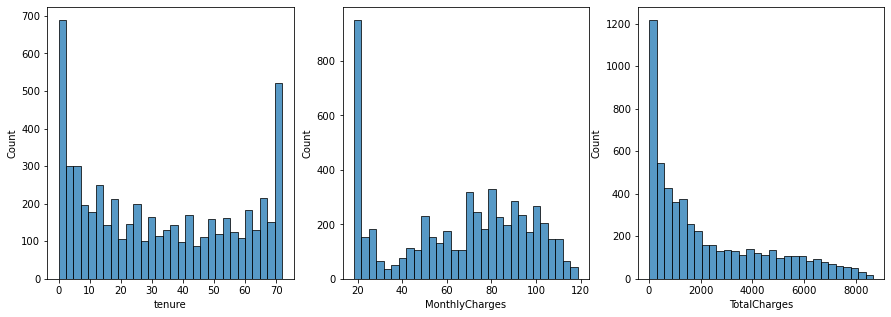

In [180]:
# Display Numerical Histo Plotand Skewness

fig, ax =plt.subplots(1,3, figsize = (15,5))
sns.histplot(x_train['tenure'], bins=30, ax=ax[0])
sns.histplot(x_train['MonthlyCharges'], bins=30, ax=ax[1])
sns.histplot(x_train['TotalCharges'], bins=30, ax=ax[2])


data_skewness = pd.DataFrame(columns=["features", "Skew", "Standard Dev"], 
                                data=[['tenure',x_train['tenure'].skew(),x_train['tenure'].std()],
                                    ['MonthlyCharges',x_train['MonthlyCharges'].skew(),x_train['MonthlyCharges'].std()],
                                    ['TotalCharges', x_train['TotalCharges'].skew(), x_train['TotalCharges'].std()]
                                    ])

data_skewness.T

Based on the information above, the data tenure and Monthly Charges are symmetrical. As for the Total Charges, it is moderately skewed. To make it easier to perform another feature selection later, scaling will be done with the Min max scaler.

In [181]:
# Splitting data for scale and encode

num_split_minmax = num_columns
cat_split_ohe = ['gender']
cat_split_ord = x_train_cat.loc[:, ~x_train_cat.columns.isin(cat_split_ohe)].columns.tolist()

print('Scale Numerical Min Max : ', num_split_minmax)
print('Encode Categorical OHE : ', cat_split_ohe)
print('Encode Categorical Ordinal : ', cat_split_ord)

# Define Pipeline for Scaling adnEncoding 

num_minmax_pipeline = make_pipeline(SimpleImputer(strategy='median'), # Imputer only for anticipatipn
                             MinMaxScaler()
                             )
num_robust_pipeline = make_pipeline(SimpleImputer(strategy='median'),
                             RobustScaler()
                             )
num_standard_pipeline = make_pipeline(SimpleImputer(strategy='median'),
                             StandardScaler()
                             )
cat_ohe_pipeline = make_pipeline(OneHotEncoder(handle_unknown = 'ignore')) 
cat_ord_pipeline = make_pipeline(OrdinalEncoder())


# Merging scaling/encoding with column which need to be scaling/encoding

data_pipeline = ColumnTransformer([
    ('pipeline_minmax', num_minmax_pipeline, num_split_minmax)
    , ('pipeline_ohe', cat_ohe_pipeline, cat_split_ohe)
    , ('pipeline_ord', cat_ord_pipeline, cat_split_ord)
], verbose=True)

Scale Numerical Min Max :  ['tenure', 'MonthlyCharges', 'TotalCharges']
Encode Categorical OHE :  ['gender']
Encode Categorical Ordinal :  ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [182]:
# Check Pipeline

data_pipeline

ColumnTransformer(transformers=[('pipeline_minmax',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['tenure', 'MonthlyCharges', 'TotalCharges']),
                                ('pipeline_ohe',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['gender']),
                                ('pipeline_ord',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder())]),
                                 ['SeniorCitizen', 'Partner', 'Dependents',
                                  'PhoneService', 'MultipleLin

In [183]:
# Transform all Features set

X_train = data_pipeline.fit_transform(x_train)
X_test = data_pipeline.transform(x_test)
X_val = data_pipeline.transform(x_val)

[ColumnTransformer]  (1 of 3) Processing pipeline_minmax, total=   0.0s
[ColumnTransformer] .. (2 of 3) Processing pipeline_ohe, total=   0.0s
[ColumnTransformer] .. (3 of 3) Processing pipeline_ord, total=   0.0s


In [184]:
X_train_df = pd.DataFrame(X_train, columns = num_split_minmax+['female','male']+cat_split_ord)
X_val_df = pd.DataFrame(X_val, columns = num_split_minmax+['female','male']+cat_split_ord)
X_test_df = pd.DataFrame(X_test, columns = num_split_minmax+['female','male']+cat_split_ord)

## Feature Selection (2)

In this Feature Selection will be done with Chi square Statistics.

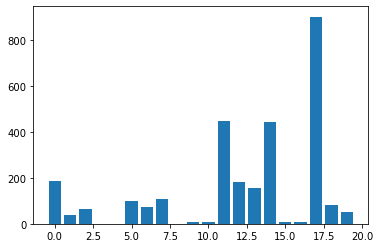

In [185]:
# Determine Score function

fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X_train_df, y_train)

# Plot the scores

plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [186]:
y_train = y_train.replace(['No'], 0)
y_train = y_train.replace(['Yes'], 1)

y_val = y_val.replace(['No'], 0)
y_val = y_val.replace(['Yes'], 1)

y_test = y_test.replace(['No'], 0)
y_test = y_test.replace(['Yes'], 1)

In [187]:
# Scores for each features

pd.DataFrame(list(X_train_df), fs.scores_)


,0
184.671079,tenure
38.596725,MonthlyCharges
62.852676,TotalCharges
0.836240,female
0.805119,male
99.764612,SeniorCitizen
72.676730,Partner
107.929433,Dependents
0.089057,PhoneService
7.557080,MultipleLines


From the lowest score below 20 above, gender, PhoneService, InternetService, StreamingTV, and StreamingMovies will not be used. While the highest scores such as Contract, Online Security, and Tech Support definitely will be used. Even if there is a high score, all features with a score above 20 will be used to categorizing customer.

In [188]:
# Define the Column to drop

final_columns_drop = ['female','male','PhoneService','MultipleLines','InternetService','StreamingTV','StreamingMovies']
final_columns_used = X_train_df.loc[:, ~X_train_df.columns.isin(final_columns_drop )].columns.tolist()
print('Column to use later : ', final_columns_used)

Column to use later :  ['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen', 'Partner', 'Dependents', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [189]:
# Drop the column

X_train_df.drop(final_columns_drop,axis=1, inplace=True)
X_val_df.drop(final_columns_drop,axis=1, inplace=True)
X_test_df.drop(final_columns_drop,axis=1, inplace=True)

# 6 - Model Definition

The model that will be used according to the objective is ANN. In this ANN itself will be done with 2 kinds of API, namely sequential and Functional.

In [106]:
AUTOTUNE = tf.data.AUTOTUNE

## Before Improvement

Sequential API
---

For Initial Sequential Model, my Input shape based on column length. Because we about claasifying binary, the choosen activation at the end is sigmoid and the loss parameter is binary crossentropy. Adam is most popular optimizer, so I use it for initial optimizer. Meanwhile, the other number for neuron, number of dense, epochs, and batch size is choosen random.

In [57]:
# Define Initial Sequential Model

tf.random.set_seed(17)

model_1A = keras.models.Sequential()
model_1A.add(keras.layers.Dense(10, input_shape=(13,), activation='relu'))
model_1A.add(keras.layers.Dense(20, activation='relu'))
model_1A.add(keras.layers.Dense(10, activation='relu'))
model_1A.add(keras.layers.Dense(1, activation='sigmoid'))



2022-09-09 15:35:42.458444: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Functional API
---

For Initial Functional API Model, my Input shape based on column length. Similiar with the Sequential, the choosen activation at the end is sigmoid and the loss parameter is binary crossentropy. Adam also choosen as optimizer. For the other number for neuron, number of dense, epochs, and batch size (Similiar with the Sequential) also choosen random. Basically, the number and order is almost identical with sequential but it is only in functional form.

In [57]:
# Define Initial Functional Model

tf.random.set_seed(17)

visible = tf.keras.layers.Input(shape=(13,))
hidden1 = tf.keras.layers.Dense(10, activation='relu')(visible)
hidden2 = tf.keras.layers.Dense(20, activation='relu')(hidden1)
hidden3 = tf.keras.layers.Dense(10, activation='relu')(hidden2)
output = tf.keras.layers.Dense(1, activation='sigmoid')(hidden3)
model_2A = tf.keras.models.Model(inputs=visible, outputs=output)


2022-09-09 15:40:37.883773: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## After Improvement

These Improvement is done to expecting better model than before Improvement in each of the API.

Sequential API
---

In improvement we will try to add kernel initializer, kernel regulaizer, batch normalization, and dropout rate. Based on the notes, Typically the dropout rate set between 10% and 50%. As for kernel_initializer and kernel_regularizer , those are choosen random.

In [124]:
tf.random.set_seed(17) # gunakan set_seed untuk menghasilkan model yang mempunyai performa yang sama

model_1B = keras.models.Sequential()
model_1B.add(keras.layers.Dense(10,input_shape=(13,),kernel_initializer=keras.initializers.GlorotUniform()))
model_1B.add(keras.layers.Activation('relu'))
model_1B.add(keras.layers.BatchNormalization())
model_1B.add(keras.layers.Dropout(rate=0.1))
model_1B.add(keras.layers.Dense(20,kernel_regularizer=keras.regularizers.L2()))
model_1B.add(keras.layers.Activation('relu'))
model_1B.add(keras.layers.BatchNormalization())
model_1B.add(keras.layers.Dropout(rate=0.1))
model_1B.add(keras.layers.Dense(10))
model_1B.add(keras.layers.Activation('relu'))
model_1B.add(keras.layers.BatchNormalization())
model_1B.add(keras.layers.Dropout(rate=0.1))
model_1B.add(keras.layers.Dense(1, activation='sigmoid'))


Functional API
---

The process and additional layers are similiar with the sequential. Both kernel_initializer and kernel_regularizer are chosen random, and also adding rate similiar with Sequential. However, in this API, batch normalization are not added (Because after training trial, the model loss turn into not good).

In [190]:
# Define Initial Functional Model

tf.random.set_seed(17)

visible = keras.layers.Input(shape=(13,))
hidden1 = keras.layers.Dense(10, kernel_initializer=keras.initializers.GlorotUniform())(visible)
hidden1a = keras.layers.Activation('relu')(hidden1)
# hidden1b = keras.layers.BatchNormalization()(hidden1a)
hidden1c = keras.layers.Dropout(rate=0.1)(hidden1a)
hidden2 = keras.layers.Dense(20, kernel_regularizer=tf.keras.regularizers.L2())(hidden1c)
hidden2a = keras.layers.Activation('relu')(hidden2)
# hidden2b = keras.layers.BatchNormalization()(hidden2a)
hidden2c = keras.layers.Dropout(rate=0.1)(hidden2a)
hidden3 = keras.layers.Dense(10, kernel_regularizer=tf.keras.regularizers.L2())(hidden2c)
hidden3a = keras.layers.Activation('relu')(hidden3)
# hidden3b = keras.layers.BatchNormalization()(hidden3a)
hidden3c = keras.layers.Dropout(rate=0.1)(hidden3a)
output = keras.layers.Dense(1, activation='sigmoid')(hidden3c)
model_2B = keras.models.Model(inputs=visible, outputs=output)


# 7 - Model Training

## Before Improvement

All of the after improvement compiled model and fit parameter is similiar between Sequential and Functional.

Sequential API
---

In [58]:
# Compile Initial Sequential Model

model_1A.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Fit Initial Sequential Model

history_1A = model_1A.fit(X_train_df, y_train, epochs=100, batch_size=10, validation_data=(X_val_df, y_val), verbose=1)

Epoch 1/100
570/570 [==============================] - 2s 2ms/step - loss: 0.4868 - accuracy: 0.7533 - val_loss: 0.4102 - val_accuracy: 0.7930
Epoch 2/100
570/570 [==============================] - 1s 1ms/step - loss: 0.4490 - accuracy: 0.7795 - val_loss: 0.3989 - val_accuracy: 0.7962
Epoch 3/100
570/570 [==============================] - 1s 1ms/step - loss: 0.4412 - accuracy: 0.7874 - val_loss: 0.4017 - val_accuracy: 0.7946
Epoch 4/100
570/570 [==============================] - 1s 1ms/step - loss: 0.4368 - accuracy: 0.7902 - val_loss: 0.4006 - val_accuracy: 0.7994
Epoch 5/100
570/570 [==============================] - 1s 1ms/step - loss: 0.4326 - accuracy: 0.7909 - val_loss: 0.3926 - val_accuracy: 0.8088
Epoch 6/100
570/570 [==============================] - 1s 1ms/step - loss: 0.4302 - accuracy: 0.7976 - val_loss: 0.3980 - val_accuracy: 0.8120
Epoch 7/100
570/570 [==============================] - 1s 1ms/step - loss: 0.4283 - accuracy: 0.7971 - val_loss: 0.3932 - val_accuracy: 0.8167

Functional API
---

In [58]:
# Compile Initial Functional Model

model_2A.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Fit Initial Functional Model

history_2A = model_2A.fit(X_train_df, y_train, epochs=100, batch_size=10, validation_data=(X_val_df, y_val), verbose=1)

Epoch 1/100
570/570 [==============================] - 2s 2ms/step - loss: 0.5041 - accuracy: 0.7375 - val_loss: 0.4891 - val_accuracy: 0.7457
Epoch 2/100
570/570 [==============================] - 1s 1ms/step - loss: 0.4528 - accuracy: 0.7730 - val_loss: 0.4861 - val_accuracy: 0.7551
Epoch 3/100
570/570 [==============================] - 1s 2ms/step - loss: 0.4438 - accuracy: 0.7793 - val_loss: 0.4703 - val_accuracy: 0.7773
Epoch 4/100
570/570 [==============================] - 1s 1ms/step - loss: 0.4367 - accuracy: 0.7877 - val_loss: 0.4691 - val_accuracy: 0.7773
Epoch 5/100
570/570 [==============================] - 1s 1ms/step - loss: 0.4325 - accuracy: 0.7890 - val_loss: 0.4548 - val_accuracy: 0.7804
Epoch 6/100
570/570 [==============================] - 1s 1ms/step - loss: 0.4293 - accuracy: 0.7923 - val_loss: 0.4678 - val_accuracy: 0.7788
Epoch 7/100
570/570 [==============================] - 1s 1ms/step - loss: 0.4259 - accuracy: 0.7967 - val_loss: 0.4561 - val_accuracy: 0.7915

## After Improvement

All of the after improvement compiled model and fit parameter is also similiar between Sequential and Functional.

Sequential API
---

In [125]:
# Compile Improved Sequential Model

model_1B.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

# Fit Improved Sequential Model

history_1B = model_1B.fit(X_train_df, y_train, epochs=100, batch_size=10, validation_data=(X_val_df, y_val), verbose=1)

Epoch 1/100
570/570 [==============================] - 2s 2ms/step - loss: 0.6876 - accuracy: 0.6891 - val_loss: 0.5473 - val_accuracy: 0.7757
Epoch 2/100
570/570 [==============================] - 1s 2ms/step - loss: 0.5725 - accuracy: 0.7491 - val_loss: 0.5028 - val_accuracy: 0.7757
Epoch 3/100
570/570 [==============================] - 1s 2ms/step - loss: 0.5350 - accuracy: 0.7653 - val_loss: 0.4728 - val_accuracy: 0.7899
Epoch 4/100
570/570 [==============================] - 1s 2ms/step - loss: 0.5102 - accuracy: 0.7570 - val_loss: 0.4607 - val_accuracy: 0.8009
Epoch 5/100
570/570 [==============================] - 1s 2ms/step - loss: 0.4942 - accuracy: 0.7651 - val_loss: 0.4471 - val_accuracy: 0.8073
Epoch 6/100
570/570 [==============================] - 1s 2ms/step - loss: 0.4802 - accuracy: 0.7660 - val_loss: 0.4407 - val_accuracy: 0.7978
Epoch 7/100
570/570 [==============================] - 1s 2ms/step - loss: 0.4800 - accuracy: 0.7695 - val_loss: 0.4346 - val_accuracy: 0.8057

Functional API
---

In [191]:
# Compile Improved Functional Model

model_2B.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

# Fit Improved Functional Model

history_2B = model_2B.fit(X_train_df, y_train, epochs=100, batch_size=10, validation_data=(X_val_df, y_val), verbose=1)

Epoch 1/100
570/570 [==============================] - 2s 2ms/step - loss: 0.6426 - accuracy: 0.7346 - val_loss: 0.5256 - val_accuracy: 0.7694
Epoch 2/100
570/570 [==============================] - 1s 2ms/step - loss: 0.5190 - accuracy: 0.7700 - val_loss: 0.4773 - val_accuracy: 0.7788
Epoch 3/100
570/570 [==============================] - 1s 2ms/step - loss: 0.4847 - accuracy: 0.7783 - val_loss: 0.4604 - val_accuracy: 0.7804
Epoch 4/100
570/570 [==============================] - 1s 2ms/step - loss: 0.4756 - accuracy: 0.7816 - val_loss: 0.4510 - val_accuracy: 0.7836
Epoch 5/100
570/570 [==============================] - 1s 2ms/step - loss: 0.4682 - accuracy: 0.7849 - val_loss: 0.4527 - val_accuracy: 0.7788
Epoch 6/100
570/570 [==============================] - 1s 2ms/step - loss: 0.4624 - accuracy: 0.7881 - val_loss: 0.4437 - val_accuracy: 0.7773
Epoch 7/100
570/570 [==============================] - 1s 2ms/step - loss: 0.4557 - accuracy: 0.7879 - val_loss: 0.4431 - val_accuracy: 0.7836

# 8 - Model Evaluation

## Before Improvement

The total parameter for current sequential model is 581.

Sequential API
---

In [59]:
# freeze model (For deployment)

model_1A.trainable = False

# Display Model Summary

model_1A.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                140       
                                                                 
 dense_1 (Dense)             (None, 20)                220       
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 581
Trainable params: 0
Non-trainable params: 581
_________________________________________________________________


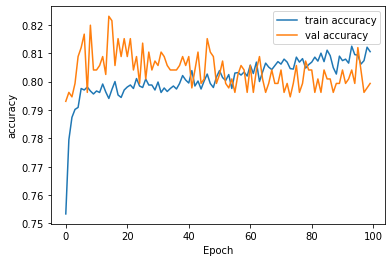

In [60]:
# Display accuracy Lineplot

fig, ax = plt.subplots()
ax.plot(range(100), history_1A.history['accuracy'],label='train accuracy')
ax.plot(range(100), history_1A.history['val_accuracy'],label='val accuracy')
ax.set_xlabel('Epoch')
ax.set_ylabel('accuracy')
plt.legend()

For Initial Sequential Model, the result of accuracy in train is between 0.73 until 0.81 with range of validation is in between 0.75 and 0.81.There are extreme inconsistent accuracy in the model. Meanwhile for the loss :

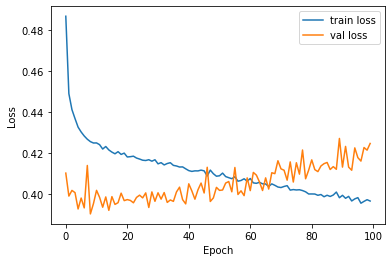

In [61]:
# Display Loss Lineplot

fig, ax = plt.subplots()
ax.plot(range(100), history_1A.history['loss'],label='train loss')
ax.plot(range(100), history_1A.history['val_loss'],label='val loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.legend()

Is not paralell between the train and validation. The validation loss is more unstable or explode rather than train loss. The model for initial Sequential Model tend to overfit.

Functional API
---

Similiar with sequential, the total parameter for current functional model is 581.

In [59]:
# freeze model

model_2A.trainable = False

# Display Model Summary

model_2A.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense (Dense)               (None, 10)                140       
                                                                 
 dense_1 (Dense)             (None, 20)                220       
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 581
Trainable params: 0
Non-trainable params: 581
_________________________________________________________________


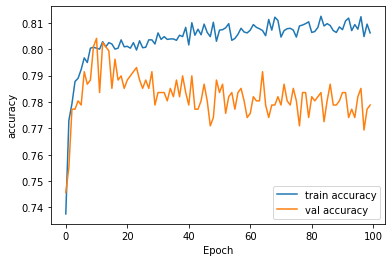

In [60]:
# Display accuracy Lineplot

fig, ax = plt.subplots()
ax.plot(range(100), history_2A.history['accuracy'],label='train accuracy')
ax.plot(range(100), history_2A.history['val_accuracy'],label='val accuracy')
ax.set_xlabel('Epoch')
ax.set_ylabel('accuracy')
plt.legend()

For Initial Functiona Model, the result of accuracy in train is between 0.72 until 0.81 with range of validation is in between 0.76 and 0.80. Both of train and validation are not consisten.  Meanwhile for the loss :

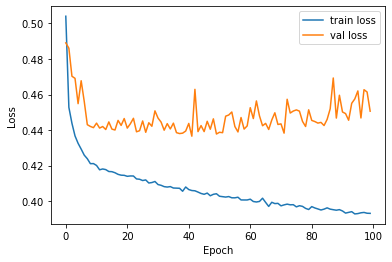

In [61]:
# Display Loss Lineplot

fig, ax = plt.subplots()
ax.plot(range(100), history_2A.history['loss'],label='train loss')
ax.plot(range(100), history_2A.history['val_loss'],label='val loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.legend()


Is also not paralell between the train and validation. The validation loss is also explode like in the sequential. From the difference itself, the model for initial Sequential Model is overfit.

## After Improvement

Sequential API
---

Total parameter of this model is difference from before improvement in Sequential model. The number is increase from 581 into 741.

In [126]:
# freeze model

model_1B.trainable = False

# Display Model Summary

model_1B.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                140       
                                                                 
 activation (Activation)     (None, 10)                0         
                                                                 
 batch_normalization (BatchN  (None, 10)               40        
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_5 (Dense)             (None, 20)                220       
                                                                 
 activation_1 (Activation)   (None, 20)                0         
                                                        

Several experiments by adding layers, increasing the number of neurons, changing the kernel, optimizer have also been carried out. After trial and error experiment, so far this model has optimal loss and accuracy.

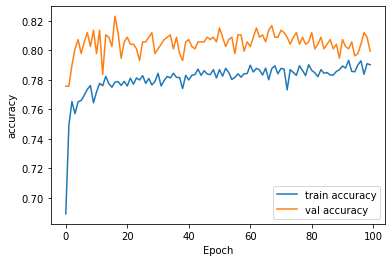

In [127]:
# Display accuracy Lineplot

fig, ax = plt.subplots()
ax.plot(range(100), history_1B.history['accuracy'],label='train accuracy')
ax.plot(range(100), history_1B.history['val_accuracy'],label='val accuracy')
ax.set_xlabel('Epoch')
ax.set_ylabel('accuracy')
plt.legend()

In this Sequential with the model results above, it can be seen that the accuracy range on the train is reduced to 0.68 to 0.79. As for the validation, it becomes 0.74 to 0.79. From the shape, both train and validation loss are still exploding. But at least it is almost parallel to the initial Sequential model. As for the loss :

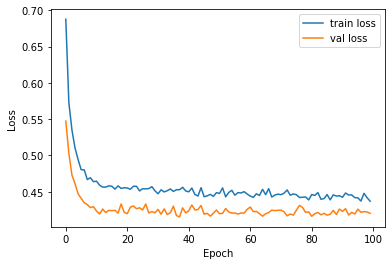

In [128]:

# Display Loss Lineplot

fig, ax = plt.subplots()
ax.plot(range(100), history_1B.history['loss'],label='train loss')
ax.plot(range(100), history_1B.history['val_loss'],label='val loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.legend()


Is now moew paralell between the train and validation. The validation loss and accuracy loss not as explode in accuracy. In the end, the model for improved Sequential Model still overfit.

Functional API
---

Total parameter of this model is not difference from before improvement in Functional model.

In [192]:
# freeze model

model_2B.trainable = False

# Display Model Summary

model_2B.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense_8 (Dense)             (None, 10)                140       
                                                                 
 activation_3 (Activation)   (None, 10)                0         
                                                                 
 dropout_3 (Dropout)         (None, 10)                0         
                                                                 
 dense_9 (Dense)             (None, 20)                220       
                                                                 
 activation_4 (Activation)   (None, 20)                0         
                                                                 
 dropout_4 (Dropout)         (None, 20)                0   

In functional, several experiments by adding layers, increasing the number of neurons, changing the kernel, optimizer have also been carried out. So far the obtained model is not included as good either. We can see the result of accuracy and loss from the graph below.

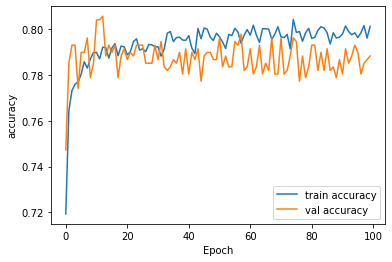

In [185]:
# Display accuracy Lineplot

fig, ax = plt.subplots()
ax.plot(range(100), history_2B.history['accuracy'],label='train accuracy')
ax.plot(range(100), history_2B.history['val_accuracy'],label='val accuracy')
ax.set_xlabel('Epoch')
ax.set_ylabel('accuracy')
plt.legend()

Similiar with functional, the accuracy also tend to explode eventhough both train and validation heading to same direction. There is still unknown what cause this problem just like all the result before.  The accuracy range for train is 0.74 until 0.8 while the validation is 0.73 until 0.81. From the accuracy, the model almost reach goodfit. Meanwhile for the loss :

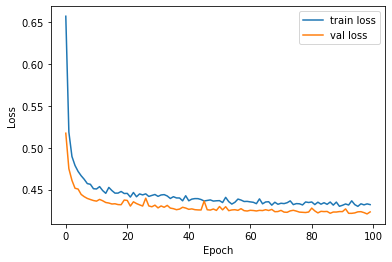

In [186]:

# Display Loss Lineplot

fig, ax = plt.subplots()
ax.plot(range(100), history_2B.history['loss'],label='train loss')
ax.plot(range(100), history_2B.history['val_loss'],label='val loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.legend()

Just like in sequential after improvement, is now paralell between the train and validation. The validation loss and accuracy loss not as explode in accuracy either. From the loss result, the improved functional model is still overfit.

Based on the result we already see the difference between before and after Improvement. The range of accuracy in train and validation somehow change along with the loss in both sequential and Functional. Unfortunately, every rerun can caused change in model result. So there is no best result to obtained so far considering the limitation of time and GPU. Eventhough the improve model accuracy is not actually improved properly, but atleast in training and validation loss in both Sequential and Functional not explode as much as before improvement. Also the loss and accuracy now heading more into same direction or parallel. In my opinion so far, to obtain the consistent model, the functional after improvement is better among all model because of consistency and better accuracy rather than model sequential after improvement.

Because based on the objective, we about perform classification for customer who churn and not. Since the main goal for Telco company is to obtain the profit as much as possible, it is better to focus on customer who about to churn. It means we must reduce missclassification of customer who does not churn but actually churn. By doing so then Telco can give special offer to customer who about to churn so the customer will likely to keep their interest and decrease probability to churn.

# 9 - Model Saving

The choosen model if Functional after improvement, so the saved model is model_2B

In [193]:
# Reform new pipeline
# Splitting data for scale and encode

num_split_minmax_p = ['tenure', 'MonthlyCharges', 'TotalCharges']
cat_split_ord_p = X_train_df.loc[:, ~X_train_df.columns.isin(num_split_minmax_p)].columns.tolist()

# Merging scaling/encoding with column which need to be scaling/encoding

data_pipeline_save = ColumnTransformer([
    ('pipeline_minmax', num_minmax_pipeline, num_split_minmax_p)
    , ('pipeline_ord', cat_ord_pipeline, cat_split_ord_p)
], verbose=True)

# Fit new pipeline
x_train_saved_pipeline = data_pipeline_save.fit_transform(x_train)

[ColumnTransformer]  (1 of 2) Processing pipeline_minmax, total=   0.0s
[ColumnTransformer] .. (2 of 2) Processing pipeline_ord, total=   0.0s


In [154]:
# # Save Pipeline

# pickle.dump(data_pipeline_save, open("preprocess_churn.pkl", "wb"))

# # Save Model

# model_2B.save("churn_model")
# ! zip -r churn_model.zip churn_model

# 10 - Model Inference

The model inference displayed and performed one by one because the rerunning occured only in one each of model. This due to avoid continuous training.

In [194]:
# transform inference column

transformed_inf= data_pipeline_save.transform(df_inf)

# Convert into dataframe

inf_df = pd.DataFrame(transformed_inf, columns = num_split_minmax_p+cat_split_ord_p)


In [64]:
# Model Inference prediction (Initial Sequential)

seq_A_inf = pd.DataFrame((model_1A.predict(inf_df) > 0.5).astype(int), columns=['Churn - 1A'])

1/1 [==============================] - 0s 124ms/step


In [65]:
# Model Inference prediction (Initial Functional)

func_A_inf = pd.DataFrame((model_2A.predict(inf_df) > 0.5).astype(int), columns=['Churn - 2A'])

1/1 [==============================] - 0s 100ms/step


In [132]:
# Model Inference prediction (Improved Initial)

seq_B_inf = pd.DataFrame((model_1B.predict(inf_df) > 0.5).astype(int), columns=['Churn - 1B'])

1/1 [==============================] - 0s 139ms/step


In [195]:
# # Model Inference prediction (Improved Functional)

func_B_inf = pd.DataFrame((model_2B.predict(inf_df) > 0.5).astype(int), columns=['Churn - 2B'])

1/1 [==============================] - 0s 75ms/step


In [65]:
# Concate into Inference Table (Initial Sequential)

df_inf_with_pred1 = pd.concat([df_inf,seq_A_inf], axis = 1)
df_inf_with_pred1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn - 1A
0,4692-NNQRU,Female,No,Yes,No,21,Yes,No,Fiber optic,No,No,Yes,Yes,No,No,One year,No,Electronic check,79.20,1742.45,No,0
1,2038-YSEZE,Female,No,No,No,29,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Month-to-month,No,Mailed check,67.45,1801.10,No,0
2,7718-UPSKJ,Female,No,Yes,No,69,Yes,No,Fiber optic,Yes,Yes,No,Yes,Yes,Yes,One year,Yes,Credit card (automatic),106.40,7251.90,No,0
3,2114-MGINA,Female,No,No,No,14,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Mailed check,89.80,1129.10,Yes,1
4,4369-HTUIF,Male,Yes,No,No,6,Yes,No,Fiber optic,Yes,No,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),85.15,503.60,Yes,0
5,8166-ORCHU,Male,Yes,Yes,No,33,Yes,No,Fiber optic,Yes,Yes,No,Yes,No,Yes,One year,Yes,Electronic check,93.55,3055.50,No,0
6,0942-KOWSM,Female,No,Yes,Yes,30,Yes,No,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),80.80,2369.30,No,0
7,4159-NAAIX,Female,No,No,No,63,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Two year,No,Bank transfer (automatic),97.45,6253.00,No,0
8,1223-UNPKS,Male,No,Yes,Yes,20,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.05,400.00,No,0
9,2569-WGERO,Female,No,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No,0


In [67]:
# Concate into Inference Table (Initial Functional)

df_inf_with_pred2 = pd.concat([df_inf,func_A_inf], axis = 1)
df_inf_with_pred2

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn - 2A
0,4692-NNQRU,Female,No,Yes,No,21,Yes,No,Fiber optic,No,No,Yes,Yes,No,No,One year,No,Electronic check,79.20,1742.45,No,0
1,2038-YSEZE,Female,No,No,No,29,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Month-to-month,No,Mailed check,67.45,1801.10,No,0
2,7718-UPSKJ,Female,No,Yes,No,69,Yes,No,Fiber optic,Yes,Yes,No,Yes,Yes,Yes,One year,Yes,Credit card (automatic),106.40,7251.90,No,0
3,2114-MGINA,Female,No,No,No,14,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Mailed check,89.80,1129.10,Yes,1
4,4369-HTUIF,Male,Yes,No,No,6,Yes,No,Fiber optic,Yes,No,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),85.15,503.60,Yes,1
5,8166-ORCHU,Male,Yes,Yes,No,33,Yes,No,Fiber optic,Yes,Yes,No,Yes,No,Yes,One year,Yes,Electronic check,93.55,3055.50,No,0
6,0942-KOWSM,Female,No,Yes,Yes,30,Yes,No,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),80.80,2369.30,No,0
7,4159-NAAIX,Female,No,No,No,63,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Two year,No,Bank transfer (automatic),97.45,6253.00,No,0
8,1223-UNPKS,Male,No,Yes,Yes,20,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.05,400.00,No,0
9,2569-WGERO,Female,No,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No,0


In [133]:
# Concate into Inference Table (Improved Sequential)

df_inf_with_pred3 = pd.concat([df_inf, seq_B_inf], axis = 1)
df_inf_with_pred3

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn - 1B
0,4692-NNQRU,Female,No,Yes,No,21,Yes,No,Fiber optic,No,No,Yes,Yes,No,No,One year,No,Electronic check,79.20,1742.45,No,0
1,2038-YSEZE,Female,No,No,No,29,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Month-to-month,No,Mailed check,67.45,1801.10,No,0
2,7718-UPSKJ,Female,No,Yes,No,69,Yes,No,Fiber optic,Yes,Yes,No,Yes,Yes,Yes,One year,Yes,Credit card (automatic),106.40,7251.90,No,0
3,2114-MGINA,Female,No,No,No,14,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Mailed check,89.80,1129.10,Yes,1
4,4369-HTUIF,Male,Yes,No,No,6,Yes,No,Fiber optic,Yes,No,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),85.15,503.60,Yes,0
5,8166-ORCHU,Male,Yes,Yes,No,33,Yes,No,Fiber optic,Yes,Yes,No,Yes,No,Yes,One year,Yes,Electronic check,93.55,3055.50,No,0
6,0942-KOWSM,Female,No,Yes,Yes,30,Yes,No,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),80.80,2369.30,No,0
7,4159-NAAIX,Female,No,No,No,63,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Two year,No,Bank transfer (automatic),97.45,6253.00,No,0
8,1223-UNPKS,Male,No,Yes,Yes,20,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.05,400.00,No,0
9,2569-WGERO,Female,No,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No,0


In [196]:
# Concate into Inference Table (Improved Functional)

df_inf_with_pred4 = pd.concat([df_inf,func_B_inf], axis = 1)
df_inf_with_pred4

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn - 2B
0,4692-NNQRU,Female,No,Yes,No,21,Yes,No,Fiber optic,No,No,Yes,Yes,No,No,One year,No,Electronic check,79.20,1742.45,No,0
1,2038-YSEZE,Female,No,No,No,29,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Month-to-month,No,Mailed check,67.45,1801.10,No,0
2,7718-UPSKJ,Female,No,Yes,No,69,Yes,No,Fiber optic,Yes,Yes,No,Yes,Yes,Yes,One year,Yes,Credit card (automatic),106.40,7251.90,No,0
3,2114-MGINA,Female,No,No,No,14,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Mailed check,89.80,1129.10,Yes,1
4,4369-HTUIF,Male,Yes,No,No,6,Yes,No,Fiber optic,Yes,No,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),85.15,503.60,Yes,1
5,8166-ORCHU,Male,Yes,Yes,No,33,Yes,No,Fiber optic,Yes,Yes,No,Yes,No,Yes,One year,Yes,Electronic check,93.55,3055.50,No,0
6,0942-KOWSM,Female,No,Yes,Yes,30,Yes,No,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),80.80,2369.30,No,0
7,4159-NAAIX,Female,No,No,No,63,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Two year,No,Bank transfer (automatic),97.45,6253.00,No,0
8,1223-UNPKS,Male,No,Yes,Yes,20,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.05,400.00,No,0
9,2569-WGERO,Female,No,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No,0


Based on the result, model 1A (Sequential before improvement) and model 1B (Sequential after improvement) has 1 false result while the other two functional model can predict the current inference accurately.

# 11 - Conclusion

Based on EDA

- There were 5174 people who were still loyal Telco, while 1869 people who no longer subscribed to Telcos. The amount between churn and not is not balanced. From a company perspective, this is more preferable because at least there are still many who want to use Telco services.

- The number of male and female customers is almost similar. However, in overall male customers, there are 67 more people than female customers but more female customers stop their contract with Telco than male.

- The dataset also illustrate that as many as 84% of Telco customers are not Senior Citizens. Meanwhile, 16% of them have become senior netizens. The number of non-senior citizens is more due to the possibility that they still need telecommunication services more than senior citizens. 

- Most of Telco's customers do not have a Partner. However, when viewed from the Churn number, most loyal customers are those who have partners, although the difference with those who do not have partners is not much different. While those who churn mostly are those who do not have a Partner.

- Most Telco customers are not dependent, in the sense that they are still dependent on partners or other people. In both categories Churn is dominant in these independents.
Meanwhile, most of the customers who are not dependents do not have partners. For the dependents, mostly have partners. This makes it possible that customers who are mostly independents have their own income while those who are dependents do not have their own income.

- Most customers use Phone Service provided by Telco. Those who not use Phone Service only subscribe to Internet Service but only a few in number. As for the Multiple line, the number that has multiple lines and those who not are nearly similiar. Customers who opt for multiple lines will be charged a higher charge. For information that the No and yes MultipleLines options are only owned by those who have PhoneService.

- There are 2 kinds of options for subscribing to Internet Service, namely Fiber Optics and DSL. There are 3096 customers choosing Fiber Optics, 2421 customers choosing DSL, and 1526 customers not subscribe to internet service provided by Telco. Based on the graph, even though Fiber Optics has the most customers, there are also a lot of customers who churn from this service. The number of churn is very large so that currently DSL services are the highest. The Internet Service also provides options for Online Security, Online Backup, Device Protection, Tech Support, Streaming TV, and Streaming Movies. Customers who do not subscribe to the internet will automatically not have Online Security, Online Backup, Device Protection, Tech Support, Streaming TV, and Streaming Movies.

- Both DSL internet services and Fiber Optic have OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, and StreamingMovies options. Those option only selection whether the customer wants to sign up internet service with this additional services or not. Usually, the more additional services, the higher the charge issued by the customer.

- Two year contracts will be charged more than one year or per month only. This is obvious because if the customer paid the service annually, then they do not need to pay monthly. Most customers choose a Telco subscription contract with month to month. This means that as many as 55% of customers prefer to contract for a month. 

- Most customers who churn are those whose subscription contracts are only monthly. This is because a monthly subscription will be safer to terminate the contract because the cost is not as high as during a one year or two year contract. Usually, customers whose contracts are at one year or two years, when they about to churn, they will terminate the contract at the end of the period to avoid losses.

- Telco provides payment services using Electronic Check, Mailed Check, Bank transfer, and Credit card. Each of the four methods has the option of whether the billing requires paper or not. When viewed from the Paperless billing, most customers choose not to use paper and the majority of the method is Electronic Check. As for those who use Paper, most of them choose the Mailed Check payment method. Some customers choose to use paperless billing so that information data between customers and telcos can be more securely maintained, but sometimes customers will find it easier to miss payments with this billing method. For those with paper option, usually they choosing this option to get a simple reminder and sometimes keep the proof of payment can be more conevenient for them. However, customers who do not choose paperless billing will usually incur additional fees for paper, envelopes, stamps and others.

- In tenure, there is no specific range that indicates that a person churns or not, but in those who churn the tenure tends to be shorter. As for the Monthly charges, the range is also similiar, but customers who churn tend to stop because they are charged at a high amount. The last is Total Charges, where the range and pattern are not much different and the two churn categories tend to overlap to the left.

- Between tenure and MonthlyCharges: There is no relationship between the two attributes because the charge depends on the service signed up by the customer. However, customers who churn tend to have high Monthly Charges.
- Between MonthlyCharges and TotalCharges: The higher the Total Charges, the higher the Monthly Charges. It can be seen that none of the data has a low MonthlyCharges and a high TotalCharges. But there is a lot of data where MonthlyCharges is high but TotalCharges is low. In the position of high charges, many customers churn.
- Between TotalCharges and tenure: The longer the tenure, the higher the charge. There is no data with high total charge but low tenure. Most of the customers who churn in this data are those whose tenure and total charge are equivalent (linearly related) but the pattern is still not clear.

From some of the information above, there is no definite information when it is time for customer to churn and when not to churn when viewed from the demographics, signed up services, and account information. However, some customers stop subscribing when they are subject to a high charge. Another possibility is that the customer will churn if the Telco provider is unsatisfactory or the service offered is lacking so that they feel that there is another provider that is better.





Based on the previous objective, a model will be made to predict whether the customer is churn or not. The model will be apply the attributes 'tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen', 'Partner', 'Dependents', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling', and 'PaymentMethod' selected as a feature to predict 'Churn' based on features selection. After doing several data processing, proceed to perform modelling with ANN (Artificial Neural Network) in both Sequential API and Functional API. By doing initial model API, model imrovement is conducted in both API. Model improvement is carried out by considering which model is more consistent in its accuracy and loss results. After several trials and errors, a functional model was chosen after the improvement which was deemed more consistent than the other models, although the accuracy was not as high as before the improvement. The choosen model has below model

In [137]:
model_2B.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense_12 (Dense)            (None, 10)                140       
                                                                 
 activation_3 (Activation)   (None, 10)                0         
                                                                 
 dropout_3 (Dropout)         (None, 10)                0         
                                                                 
 dense_13 (Dense)            (None, 20)                220       
                                                                 
 activation_4 (Activation)   (None, 20)                0         
                                                                 
 dropout_4 (Dropout)         (None, 20)                0   

The range accuracy for this chosen model on train is 0.74 until 0.8 while the validation is 0.73 until 0.81. Because based on the objective, we about perform classification for customer who churn and not. Since the main goal for Telco company is to obtain the profit as much as possible, it is better to focus on customer who about to churn. It means we must reduce missclassification of customer who does not churn but actually churn. By doing so then Telco can give special offer to customer who about to churn so the customer will likely to keep their interest and decrease probability to churn.

For further development, it is possible to search for better number of hidden layer, number of neuron, activation function, kernel initialization, kernel regulalarization, drop rate, optimazion, and others. Considering there is limitation in the device and time, the research can not be done further. Trial and error is the only way to conduct the best result in this method.